In [1]:
import numpy as np
pi=np.pi
from functools import partial
#
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import phasr as phr

In [3]:
phr.__version__

'0.5.4.dev32+g01ab95ecd.d20260108'

In [4]:
# Fourier Bessel
ai_Al27=np.array([0.43418e-1,0.60298e-1,0.28950e-2,-0.23522e-1,-0.79791e-2,0.23010e-2,0.10794e-2,0.12574e-3,-0.13021e-3,0.56563e-4,-0.18011e-4,0.42869e-5])
nucleus_Al27 = phr.nucleus('Al27_FB',Z=13,A=27,ai=ai_Al27,R=7)

In [5]:
#corrected_potential=phr.dirac_solvers.QED_corrections.potential_corrections(nucleus_Al27,included_corrections=['Uehling_2','Uehling_4','vs'])
corrected_potential=phr.dirac_solvers.QED_corrections.potential_corrections(nucleus_Al27,included_corrections=['Uehling_2'])

Calculating QED potential corrections...
Continuing corrections to high energies below threshold 0.0001...


In [6]:
continuumstates_l0_Al27 = phr.continuumstates(nucleus_Al27,kappa=-1,energy=1000,verbose=True,asymptotic_radius=1000)
continuumstates_l0_Al27.solve_IVP()
continuumstates_l0_Al27.phase_difference

rc= 6.6 fm
r0= 0.0057 fm
y0= [ 0.23000734 -0.00223208]
g_c (unnormalized) = 6.3318783246499155
f_c (unnormalized) = -4.916332809729072
A/B= -0.7317251895191796
 A = -14.94116820054506
 B = 20.419097790473742
norm 5.587596015684621


np.float64(-0.23244802846630108)

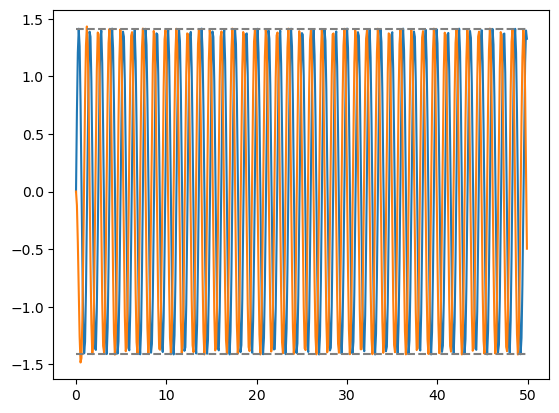

In [7]:
r=np.arange(0.,50.,0.1)
plt.plot(r,continuumstates_l0_Al27.wavefct_g(r))
plt.plot(r,continuumstates_l0_Al27.wavefct_f(r))
plt.plot(r,r*0+np.sqrt(2),color='gray',linestyle='--')
plt.plot(r,r*0-np.sqrt(2),color='gray',linestyle='--')
#plt.ylim(-2,2)
#plt.xlim(50,400)
#plt.yscale('log')

In [9]:
energy=1000
theta=np.linspace(3,7,4)

crosssection=phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_Al27,verbose=True,save_and_load_phase_shifts=False,
                                    asymptotic_radius=1000,corrected_potential=corrected_potential,potential_precision=1e-3)

E= 960.2119017052443 MeV
Calculate phaseshift for kappa= -1 , delta_diff=  -0.20758747040469494
Calculate phaseshift for kappa= -2 , delta_diff=  -0.1334560725096421
Calculate phaseshift for kappa= -3 , delta_diff=  -0.09401954131936385
Calculate phaseshift for kappa= -4 , delta_diff=  -0.06757329656003241
Calculate phaseshift for kappa= -5 , delta_diff=  -0.0482004897301298
Calculate phaseshift for kappa= -6 , delta_diff=  -0.03339182502319793
Calculate phaseshift for kappa= -7 , delta_diff=  -0.021830492118610545
Calculate phaseshift for kappa= -8 , delta_diff=  -0.01272629689062832
Calculate phaseshift for kappa= -9 , delta_diff=  -0.005556186956972908
Calculate phaseshift for kappa= -10 , delta_diff=  5.4206475347040595e-05
Calculate phaseshift for kappa= -11 , delta_diff=  0.004390355805091506
Calculate phaseshift for kappa= -12 , delta_diff=  0.007681802175523167
Calculate phaseshift for kappa= -13 , delta_diff=  0.010120172777843273
Calculate phaseshift for kappa= -14 , delta_di

KeyboardInterrupt: 